## Reinforcement Learning

In [1]:
import os
import math
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import random
import scipy.stats as stats
import numpy as np
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from pylab import plt, mpl
import yfinance as yf
import stable_baselines3
from stable_baselines3.common.callbacks import EvalCallback
import gym
import tensorflow as tf
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (10, 10) 
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
random.seed(100)
np.random.seed(100)
tf.random.set_seed(100)
np.random.seed(100)

In [3]:
# Retrieve historical Bitcoin data
symbol = 'BTC-USD'
yahoo_info = yf.Ticker(symbol)
df = yahoo_info.history(period="84mo")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-11-06,703.812012,714.257996,699.559998,711.521973,59902200,0,0
2016-11-07,710.736023,710.736023,699.903015,703.130981,65047100,0,0
2016-11-08,703.088989,712.987000,702.390015,709.848022,79660800,0,0
2016-11-09,709.825012,740.046021,708.609985,723.273010,132429000,0,0
2016-11-10,722.843994,723.018005,711.210022,715.533997,68807800,0,0
...,...,...,...,...,...,...,...
2023-11-01,34657.273438,35527.929688,34170.691406,35437.253906,22446272005,0,0
2023-11-02,35441.578125,35919.843750,34401.574219,34938.242188,20998158544,0,0
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,17158456701,0,0


In [4]:
# Apply technical analysis indicators to the DataFrame 
df = df.ta.ticker(symbol)

In [5]:
# Calculate returns
df['Returns'] = np.log(df['Close']).diff()
df['Ret_1M'] = df['Returns'].rolling(20).sum()
# Output first five values
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,Ret_1M
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,-0.074643,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,-0.072402,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,0.035111,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,-0.024968,NaN


In [6]:
# Define a custom trading strategy 
CustomStrategy = ta.Strategy(
    name="Momentum and Volatility",  # Name of the strategy
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",  # Description of the strategy

    # List of technical indicators to be applied to the DataFrame
    ta=[
        {"kind": "sma", "length": 50},  # Simple Moving Average with a period of 50
        {"kind": "sma", "length": 200},  # Simple Moving Average with a period of 200
        {"kind": "bbands", "length": 20},  # Bollinger Bands with a period of 20
        {"kind": "rsi"},  # Relative Strength Index (RSI)
        {"kind": "macd", "fast": 8, "slow": 21},  # Moving Average Convergence Divergence (MACD)
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},  # Volume-based Simple Moving Average with a period of 20
    ]
)

# Run the strategy on the DataFrame
df.ta.strategy(CustomStrategy)  
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,Ret_1M,SMA_50,...,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9,VOLUME_SMA_20
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,-0.074643,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,-0.072402,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,0.035111,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,-0.024968,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,34657.273438,35527.929688,34170.691406,35437.253906,22446272005,0,0,0.021953,0.280975,28743.992383,...,25257.101254,31362.741992,37468.382730,38.935631,0.833668,84.739309,2164.937566,200.884197,1964.053369,1.810811e+10
2023-11-02,35441.578125,35919.843750,34401.574219,34938.242188,20998158544,0,0,-0.014182,0.262855,28918.190742,...,25839.239828,31766.535352,37693.830875,37.317860,0.767551,78.173443,2070.535252,85.185506,1985.349746,1.839975e+10
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,17158456701,0,0,-0.005911,0.256969,29082.043750,...,26551.048594,32160.066211,37769.083828,34.881879,0.729297,75.571295,1934.917412,-40.345867,1975.263279,1.898827e+10


In [7]:
features_list = []
for r in range(10, 65, 5):
    df['Ret_'+str(r)] = df.Returns.rolling(r).sum()
    df['Std_'+str(r)] = df.Returns.rolling(r).std()
    features_list.append('Ret_'+str(r))
    features_list.append('Std_'+str(r))

# Drop columns from dataframe
df.drop(['Dividends','Stock Splits'], axis=1, inplace=True)    

# Drop NaN values
df.dropna(inplace=True)

Text(0.5, 1.0, 'Features Set Correlations')

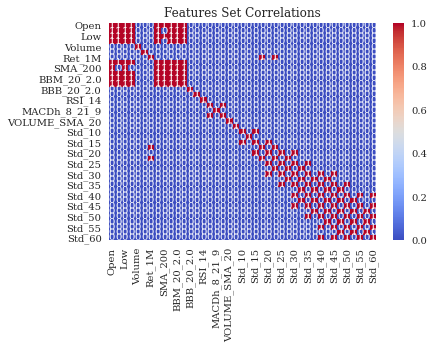

In [8]:
# Check correlated features
sns.heatmap(df.corr()>0.9,
annot=True,
cmap="coolwarm",
cbar=True); 
plt.title('Features Set Correlations')

In [9]:
# Remove the first feature that is correlated with any other feature
def correlated_features(data, threshold=0.9):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
# Total correlated features
drop_correlated_features = correlated_features(df)

# Drop the highly correlated features
X = df.drop(drop_correlated_features, axis=1)

# Record feature names
feature_names = X.columns

# Assuming 'Returns' is the column containing daily returns
X['d'] = (X['Returns'] > 0).astype(int)

X

,Open,Volume,Returns,Ret_1M,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_8_21_9,MACDh_8_21_9,VOLUME_SMA_20,Ret_10,Std_10,Ret_15,d
Date,,,,,,,,,,,,,,
2015-04-04,254.291000,12493500,-0.002461,-0.121224,19.783932,0.442125,47.508324,-4.456203,1.282742,2.583737e+07,0.030009,0.019732,-0.031245,0
2015-04-05,253.761002,19649200,0.026838,-0.108945,15.833630,0.635214,52.432292,-2.852673,2.309017,2.574402e+07,0.047407,0.021084,0.002201,1
2015-04-06,260.721008,20034200,-0.019788,-0.111068,11.549890,0.563389,48.785829,-2.331718,2.263978,2.567088e+07,0.033685,0.022278,-0.047647,0
2015-04-07,255.274002,18467400,-0.009090,-0.012244,11.517194,0.489754,47.185618,-2.219858,1.900670,2.374384e+07,0.001510,0.021421,-0.052174,0
2015-04-08,253.063995,30086400,-0.032753,-0.062897,11.571791,0.237969,41.956153,-3.167171,0.762686,2.261156e+07,0.009468,0.019822,-0.002336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,34657.273438,22446272005,0.021953,0.280975,38.935631,0.833668,84.739309,2164.937566,200.884197,1.810811e+10,0.166770,0.030926,0.220820,1
2023-11-02,35441.578125,20998158544,-0.014182,0.262855,37.317860,0.767551,78.173443,2070.535252,85.185506,1.839975e+10,0.054465,0.013603,0.209719,0
2023-11-03,34942.472656,17158456701,-0.005911,0.256969,34.881879,0.729297,75.571295,1934.917412,-40.345867,1.898827e+10,0.024211,0.012229,0.190084,0


## Improved Finance Environment

In [23]:
class Finance(gym.Env):
    def __init__(self, data, features, window, lags,
                 leverage=1, min_performance=0.85,
                 start=0, end=None, mu=None, std=None):
        super(Finance, self).__init__()
        self.features = features
        self.n_features = len(features)
        self.window = window
        self.lags = lags
        self.leverage = leverage
        self.min_performance = min_performance
        self.start = start
        self.end = end
        self.mu = mu
        self.std = std
        self.data = data
        self.episode_performances = []

        # Initialize performance and benchmark_performance attributes
        self.performance = 1
        self.benchmark_performance = 1

        # Define action and observation space
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(self.lags, self.n_features), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(2)

    def _get_state(self):
        return self.data[self.features].iloc[self.bar - self.lags:self.bar]

    def seed(self, seed):
        random.seed(seed)
        np.random.seed(seed)


    def reset(self):
        self.treward = 0
        self.accuracy = 0
        self.performance = 1
        self.bar = self.lags
        state = self.data[self.features].iloc[self.bar-self.lags:self.bar]
        return state.values

    def step(self, action):
        correct = action == self.data['d'].iloc[self.bar]
        ret = self.data['Returns'].iloc[self.bar] * self.leverage

        # Calculate rewards
        reward_1 = 1 if correct else -1
        reward_2 = abs(ret) if correct else -abs(ret)
        reward_3 = 0  

        # Compare agent's return to benchmark return
        benchmark_return = self.data['Returns'].iloc[self.bar]
        excess_return = ret - benchmark_return  # Excess return over benchmark

        # Reward for outperforming the benchmark
        outperformance_reward = excess_return if excess_return > 0 else 0

        # Update metrics
        self.treward += reward_1
        self.bar += 1
        self.accuracy = self.treward / (self.bar - self.lags)
        self.performance *= math.exp(reward_2)

        if self.performance < 0.85:  # 10% drawdown
            reward_3 -= 2  # penalty

        # Dynamically adjust position based on rewards
        custom_metric = reward_1 + reward_2 * 3 + reward_3 + outperformance_reward * 5 
        self.leverage = 1 + custom_metric / (self.bar - self.lags)

        # Define conditions for episode termination
        done = False
        if self.bar >= len(self.data):
            done = True

        # Get the next state
        state = self._get_state()

        # Combine rewards for a total reward signal
        total_reward = reward_1 + reward_2 + reward_3 + outperformance_reward * 5

        info = {
            'Performance': self.performance,
            'Accuracy': self.accuracy,
            'Excess_Return': excess_return,
            'Leverage': self.leverage
        }

        return state.values, total_reward, done, info


In [24]:
features = X.columns.tolist()

a = 0       
b = 2500
c = 638

# Initialize learn_env
learn_env = Finance(data=X.iloc[a:a+b], features=features, window=10, lags=6,
                    leverage=1, min_performance=0.85,
                    start=0, end=None, mu=None, std=None)

# Initialize valid_env
valid_env = Finance(data=X.iloc[a+b:a+b+c], features=features, window=learn_env.window,
                    lags=learn_env.lags, leverage=learn_env.leverage,
                    min_performance=learn_env.min_performance,
                    start=0, end=None, mu=learn_env.mu, std=learn_env.std)


In [16]:
# Check the information 
learn_env.data[learn_env.features].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-04-04 to 2022-02-05
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2500 non-null   float64
 1   Volume         2500 non-null   int64  
 2   Returns        2500 non-null   float64
 3   Ret_1M         2500 non-null   float64
 4   BBB_20_2.0     2500 non-null   float64
 5   BBP_20_2.0     2500 non-null   float64
 6   RSI_14         2500 non-null   float64
 7   MACD_8_21_9    2500 non-null   float64
 8   MACDh_8_21_9   2500 non-null   float64
 9   VOLUME_SMA_20  2500 non-null   float64
 10  Ret_10         2500 non-null   float64
 11  Std_10         2500 non-null   float64
 12  Ret_15         2500 non-null   float64
 13  d              2500 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 293.0 KB


In [16]:
valid_env.data[valid_env.features].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 638 entries, 2022-02-06 to 2023-11-05
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           638 non-null    float64
 1   Volume         638 non-null    int64  
 2   Returns        638 non-null    float64
 3   Ret_1M         638 non-null    float64
 4   BBB_20_2.0     638 non-null    float64
 5   BBP_20_2.0     638 non-null    float64
 6   RSI_14         638 non-null    float64
 7   MACD_8_21_9    638 non-null    float64
 8   MACDh_8_21_9   638 non-null    float64
 9   VOLUME_SMA_20  638 non-null    float64
 10  Ret_10         638 non-null    float64
 11  Std_10         638 non-null    float64
 12  Ret_15         638 non-null    float64
 13  d              638 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 74.8 KB


In [38]:
#Train the model using PPO
model = PPO("MlpPolicy", learn_env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 340  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.49e+03    |
|    ep_rew_mean          | -173        |
| time/                   |             |
|    fps                  | 299         |
|    iterations           | 2           |
|    time_elapsed         | 13          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011617787 |
|    clip_fraction        | 0.0242      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00158     |
|    learning_rate        | 0.0003      |
|    loss               

In [39]:
import pandas as pd
import numpy as np

def backtest_strategy(env, model):
    obs = env.reset()
    done = False
    actions = []
    rewards_list = []

    while not done:
        action, _states = model.predict(obs)
        actions.append(action)
        obs, reward, done, info = env.step(action)
        rewards_list.append(reward)

    df = env.data.copy()
    df = df.iloc[:len(actions)]
    df['Actions'] = actions
    df['Rewards'] = rewards_list
    df['Strategy_Returns'] = df['Actions'] * df['Returns'].shift(1).fillna(0)
    
    return df

def calculate_metrics(df):
    # Metrics for Strategy
    total_return = (df['Strategy_Returns'].sum() + 1) * 100 - 100  
    max_drawdown = ((df['Strategy_Returns'].cumsum().cummax() - df['Strategy_Returns'].cumsum()).max()) * 100 
    annualized_sharpe_ratio = df['Strategy_Returns'].mean() / df['Strategy_Returns'].std() * np.sqrt(252)
   
    # Metrics for Benchmark
    benchmark_total_return = (df['Returns'].sum() + 1) * 100 - 100  
    benchmark_max_drawdown = ((df['Returns'].cumsum().cummax() - df['Returns'].cumsum()).max()) * 100
    benchmark_annualized_sharpe_ratio = df['Returns'].mean() / df['Returns'].std() * np.sqrt(252)
    
    return (total_return, max_drawdown, annualized_sharpe_ratio), (benchmark_total_return, benchmark_max_drawdown, benchmark_annualized_sharpe_ratio)

# Run backtest_strategy to get df
df = backtest_strategy(valid_env, model)  # Replace valid_env and model with your instances

# Calculate metrics for strategy and benchmark
strategy_metrics, benchmark_metrics = calculate_metrics(df)


In [40]:
num_trials = 50

# Placeholder for storing metrics from all trials
all_strategy_metrics = []
all_benchmark_metrics = []

for trial in range(num_trials):
    # Backtest your strategy
    df = backtest_strategy(valid_env, model)
    
    # Calculate metrics for strategy and benchmark
    strategy_metrics, benchmark_metrics = calculate_metrics(df)
    
    # Append the metrics to the lists
    all_strategy_metrics.append(strategy_metrics)

# Convert list of metrics to a NumPy array for calculations
all_strategy_metrics = np.array(all_strategy_metrics)

# Calculate mean and standard error for strategy and benchmark
mean_strategy_metrics = np.mean(all_strategy_metrics, axis=0)
std_err_strategy_metrics = np.std(all_strategy_metrics, axis=0)

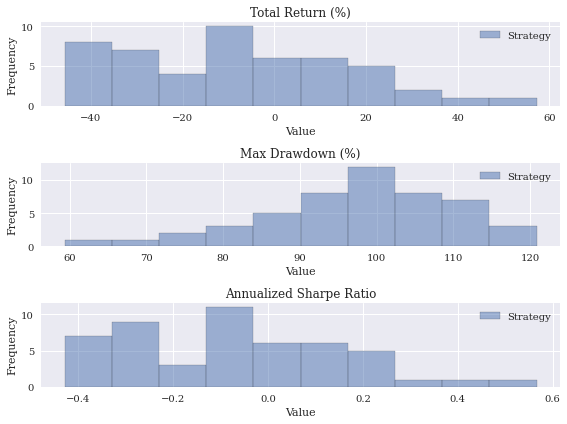

In [41]:
plt.figure(figsize=(8, 6))
for i, metric in enumerate(['Total Return (%)', 'Max Drawdown (%)', 'Annualized Sharpe Ratio']):
    plt.subplot(3,1,i+1)  
    plt.hist(all_strategy_metrics[:, i], bins=10, alpha=0.5, label='Strategy', edgecolor='k')
    plt.title(metric)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# Calculate mean metrics
mean_strategy_metrics = all_strategy_metrics.mean(axis=0)
mean_benchmark_metrics = benchmark_metrics

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(index=['Total Return (%)', 'Max Drawdown (%)', 'Annualized Sharpe Ratio'])
metrics_df['Strategy'] = mean_strategy_metrics
metrics_df['Benchmark'] = benchmark_metrics

# Display the DataFrame
metrics_df

,Strategy,Benchmark
Total Return (%),-7.691285,-18.324687
Max Drawdown (%),96.835825,110.080317
Annualized Sharpe Ratio,-0.070071,-0.158451


In [45]:
def backtest_strategy_ensemble(env, model, num_runs=30):
    df2 = env.data.copy()
    df2['Actions'] = 0
    df2['Rewards'] = 0
    df2['Signals'] = ''
    df2['Position_Size'] = 0
    
    for _ in range(num_runs):
        obs = env.reset()
        done = False
        actions = []
        rewards_list = []
        signals = []
        position_sizes = []

        while not done:
            action, _states = model.predict(obs)
            actions.append(action)
            obs, reward, done, info = env.step(action)
            rewards_list.append(reward)

            # Translate action to trading signal: 
            signal = 'Long' if action == 1 else 'Short'  
            signals.append(signal)

            # The position size is determined by the leverage
            position_size = info['Leverage']
            position_sizes.append(position_size)

        temp_df = df2.iloc[:len(actions)].copy()
        temp_df['Actions'] = actions
        temp_df['Rewards'] = rewards_list
        temp_df['Signals'] = signals
        temp_df['Position_Size'] = position_sizes
        
        df2['Actions'][:len(actions)] += temp_df['Actions']
        df2['Rewards'][:len(actions)] += temp_df['Rewards']
        df2['Signals'][:len(actions)] = temp_df['Signals']  # Override signals
        df2['Position_Size'][:len(actions)] += temp_df['Position_Size']

    # Average the actions, rewards, and position sizes over the runs
    df2['Actions'] = df2['Actions'] / num_runs
    df2['Rewards'] = df2['Rewards'] / num_runs
    df2['Position_Size'] = df2['Position_Size'] / num_runs
    df2['Strategy_Returns'] = df2['Actions'] * df2['Returns'].shift(1).fillna(0)

    return df2



<ipython-input-45-d951c9d7a8cc>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Actions'][:len(actions)] += temp_df['Actions']
<ipython-input-45-d951c9d7a8cc>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rewards'][:len(actions)] += temp_df['Rewards']
<ipython-input-45-d951c9d7a8cc>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Signals'][:len(actions)] = temp_df['Signals']  # Override signals
<ipython-input-45-

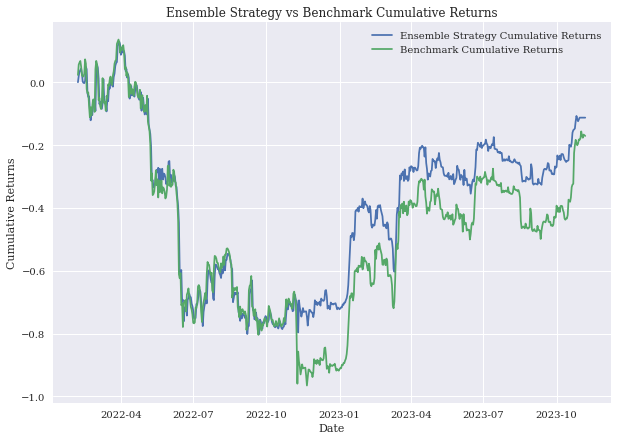

In [46]:
# Backtest the ensemble strategy
results = backtest_strategy_ensemble(valid_env, model)

# Calculate cumulative returns
strategy_cumulative_returns = results['Strategy_Returns'].cumsum()
benchmark_cumulative_returns = results['Returns'].cumsum()

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(strategy_cumulative_returns, label='Ensemble Strategy Cumulative Returns')
plt.plot(benchmark_cumulative_returns, label='Benchmark Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Ensemble Strategy vs Benchmark Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()